# Lista de Exercícios \#3
## Breno Vieira Arosa

## Questão 1

In [1]:
import numpy as np

from sklearn.datasets import make_blobs
from functools import partial

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
plt.rcParams.update({'font.size': 14})

In [3]:
X = np.array([0, 4, 6, 9])
print(f"X = {X}")

X = [0 4 6 9]


## 1.a)

In [4]:
def calculate_D(X, tresh):
    X1 = X[X <= tresh]
    X2 = X[X > tresh]
    
    y1 = X1.mean()
    y2 = X2.mean()
    
    d1 = (X1 - y1)**2
    d2 = (X2 - y2)**2
    
    D = np.hstack((d1, d2))
    
    return D.mean()

In [5]:
# vetoriza o calculo das distancias e passa o vetor X como parametro para todos argumentos de treshold
vectorized_calc_D = np.vectorize(partial(calculate_D, X))

T = np.arange(-1, 10.01, .01)
D = vectorized_calc_D(T)

/home/arosa/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
/home/arosa/.virtualenvs/ml/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/arosa/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  


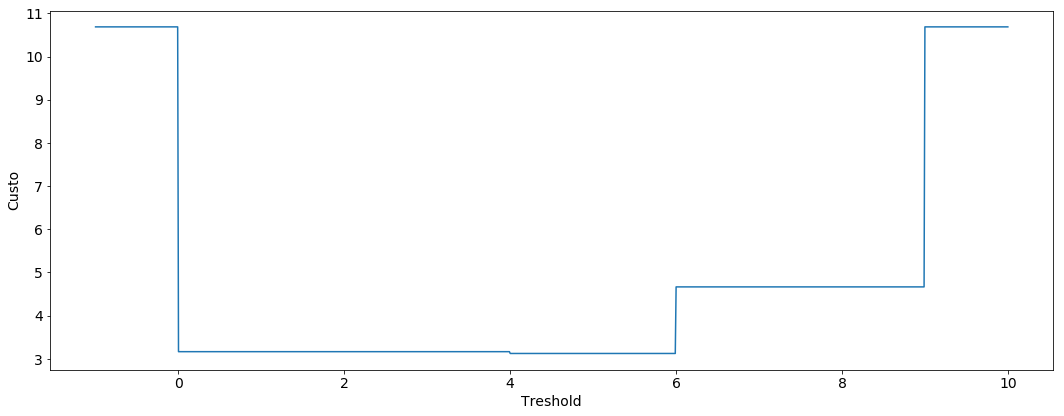

In [6]:
plt.figure(figsize=(15, 6))
   
plt.plot(T, D)

plt.xlabel("Treshold")
plt.ylabel("Custo")

plt.tight_layout()
plt.show()

## 1.b)

In [7]:
y1 = 3.
y2 = 3.4
T = 1

In [8]:
d = np.zeros((2, 4))
d[0, :] = (X - y1)**2
d[1, :] = (X - y2)**2

Z = np.exp(-d / T).sum(axis=0)

py_given_x = np.exp(-d / T) / Z

print(f"p(y|x) =\n{py_given_x}")

p(y|x) =
[[0.92824246 0.34524654 0.09621554 0.00956532]
 [0.07175754 0.65475346 0.90378446 0.99043468]]


## 1.c)

Como os elementos de x são equiprováveis temos:
\begin{equation}
D = \sum_x{p(x) \sum_y{p(y \mid x) d(x, y)}} \approx \frac{1}{N} \sum_y{p(y \mid x) d(x, y)}
\end{equation}

In [9]:
D = (py_given_x * d).sum() / 4
print(f"D = {D}")

D = 12.036140746369405


## 1.d)

\begin{equation}
p(y_i) = \sum_x{p(x) p(y_i \mid x)}
\end{equation}

\begin{equation}
y_i = \frac{\sum_x{x p(x) p(y_i \mid x)}}{p(y_i)}
\end{equation}

Com elementos de x equiprováveis obtemos: 
\begin{equation}
p(y_i) = \sum_x{p(y_i \mid x)}
\end{equation}

\begin{equation}
y_i = \frac{\sum_x{x p(y_i \mid x)}}{p(y_i)}
\end{equation}


In [10]:
py = py_given_x.sum(axis=1)
Y = (py_given_x * X).sum(axis=1) / py
print("Valores atualizados de centroides:")
print(f"y1 = {Y[0]}\ny2 = {Y[1]}")

Valores atualizados de centroides:
y1 = 1.4822097827718683
y2 = 6.469812534006276


## 1.e)

In [11]:
y1 = 3.
y2 = 3.4
T = 0.1

print("Condições iniciais:")
print(f"T = {T}\ny1 = {y1}\ny2 = {y2}")
print("\n")

d = np.zeros((2, 4))
d[0, :] = (X - y1)**2
d[1, :] = (X - y2)**2

Z = np.exp(-d / T).sum(axis=0)

py_given_x = np.exp(-d / T) / Z

print(f"p(y|x) =\n{py_given_x}")
print("\n")

D = (py_given_x * d).sum() / 4
print(f"D = {D}")
print("\n")

py = py_given_x.sum(axis=1)
Y = (py_given_x * X).sum(axis=1) / py
print("Valores atualizados de centroides:")
print(f"y1 = {Y[0]}\ny2 = {Y[1]}")

Condições iniciais:
T = 0.1
y1 = 3.0
y2 = 3.4


p(y|x) =
[[1.00000000e+00 1.65880108e-03 1.86983638e-10 7.05888391e-21]
 [7.62186519e-12 9.98341199e-01 1.00000000e+00 1.00000000e+00]]


D = 11.870265408282416


Valores atualizados de centroides:
y1 = 0.006624217182793266
y2 = 6.334624225733912


## 1.f)

In [12]:
y1 = 3.
y2 = 3.4
T = 50

print("Condições iniciais:")
print(f"T = {T}\ny1 = {y1}\ny2 = {y2}")
print("\n")

d = np.zeros((2, 4))
d[0, :] = (X - y1)**2
d[1, :] = (X - y2)**2

Z = np.exp(-d / T).sum(axis=0)

py_given_x = np.exp(-d / T) / Z

print(f"p(y|x) =\n{py_given_x}")
print("\n")

D = (py_given_x * d).sum() / 4
print(f"D = {D}")
print("\n")

py = py_given_x.sum(axis=1)
Y = (py_given_x * X).sum(axis=1) / py
print("Valores atualizados de centroides:")
print(f"y1 = {Y[0]}\ny2 = {Y[1]}")

Condições iniciais:
T = 50
y1 = 3.0
y2 = 3.4


p(y|x) =
[[0.5127972  0.49680004 0.48880187 0.47681664]
 [0.4872028  0.50319996 0.51119813 0.52318336]]


D = 13.088134141762028


Valores atualizados de centroides:
y1 = 4.663470863661966
y2 = 4.8344108274785


## 1.g)

## 2)

In [213]:
X = np.array([0, 1, 1, 1, 2, 2, 2, 1]).reshape(-1, 2)
Y = np.array([0.1, 0.2, 1.2, 1.2]).reshape(-1, 2)
T = .3

In [214]:
X

array([[0, 1],
       [1, 1],
       [2, 2],
       [2, 1]])

In [215]:
Y

array([[0.1, 0.2],
       [1.2, 1.2]])

In [216]:
def J(X, Y):
    """
    Calcula norma l2 média entre ponto e centro do cluster
    """
    d = np.zeros((Y.shape[0], X.shape[0])) # distance between point and clusters
    for i, y in enumerate(Y):
        d[i, :] = np.sqrt(((X - y)**2).sum(axis=1))
        
    return d

In [218]:
for _ in range(10):
    cost = J(X, Y)
    
    Z = np.exp(-cost / T).sum(axis=0)
    
    py_given_x = np.exp(-cost / T) / Z
    
    D = (py_given_x * cost).sum() / len(X)
    print(D)
    
    py = py_given_x.sum(axis=1)
    
    for i, y in enumerate(Y):
        Y[i, :] = (py_given_x[i].reshape(-1, 1) * X).sum(axis=0) / py[i]

0.7998280674850634
0.5539716931988768
0.5549016223667483
0.5501869550361445
0.5429167096652825
0.539425989389443
0.5381392647745352
0.5376832610046574
0.5375200250619709
0.5374609064001652


In [219]:
py_given_x.round(decimals=3)

array([[0.993, 0.857, 0.015, 0.032],
       [0.007, 0.143, 0.985, 0.968]])

In [220]:
print(Y)

[[0.50101438 1.00776929]
 [1.92530263 1.46840077]]


In [221]:
py_given_x.sum(axis=1)

array([1.89653359, 2.10346641])

In [222]:
X

array([[0, 1],
       [1, 1],
       [2, 2],
       [2, 1]])

In [223]:
(py_given_x[i].reshape(-1, 1) * X).sum(axis=1) / py[0]

array([0.00376639, 0.15062981, 2.07803393, 1.53156389])

In [224]:
py[0]

1.8965335934610157

In [285]:
# gera os dados
n_samples = 30
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=[.6, .5],
                  centers=[(1, 2), (-0.5, -1)], shuffle=True, random_state=7)

# calcula centro dos clusters
c = np.zeros((2,2))
for i, cluster in enumerate(np.unique(y)):
    c[i, :] = X[y == cluster].mean(axis=0)

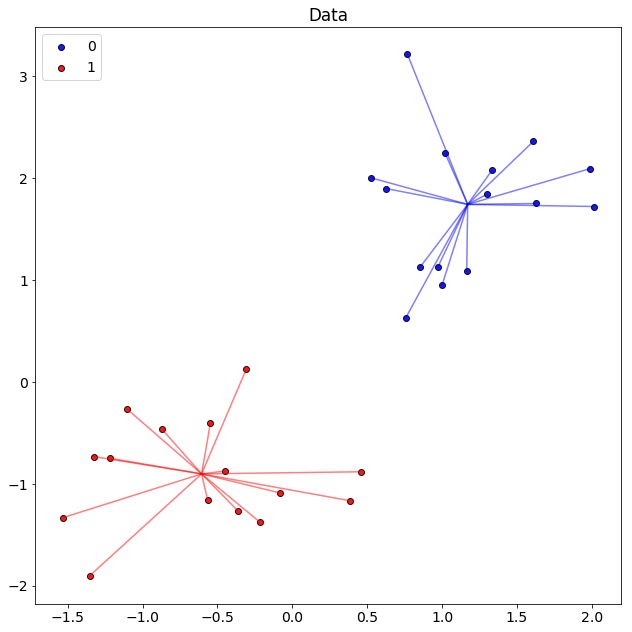

In [286]:
# visualização dos dados

plt.figure(figsize=(9, 9))
y_unique = np.unique(y)
colors = ['b', 'r']
for cluster_value, color in zip(y_unique, colors):
    cluster_X = X[y == cluster_value]
    
    plt.scatter(cluster_X[:, 0], cluster_X[:, 1], c=color,
                alpha=0.9, edgecolor='k', label=cluster_value)
    
    for x in cluster_X:
        plt.plot([c[cluster_value, 0], x[0]], [c[cluster_value, 1], x[1]],
                 c=color, alpha=.5, markersize=10)


plt.legend(loc="upper left")
plt.title("Data")

plt.tight_layout()
plt.show()

In [287]:
print(f"Ponto de mínimo determinado pela posição dos centros de clusters.")
print(f"Centro dos clusters: {c[0, :]} e {c[1, :]}")

Ponto de mínimo determinado pela posição dos centros de clusters.
Centro dos clusters: [1.17118778 1.74114274] e [-0.60639256 -0.90198388]


Usaremos Deterministic Anneling.    
A função custo será a distância geométrica entre o ponto e o centro do seu cluster.

In [296]:
def clustering_deterministic_anneling(X, n_clusters, J, N, K, t0, alpha=0.9):
    """
    X: posição dos pontos
    n_clusters: número de clusters
    J: função custo
    N: número de iterações por temperatura
    K: número de temperaturas testadas
    t0: temperatura inicial
    alpha: decaimento da temperatura
    """
    
    sample_size = X.shape[0]
    
    S = np.zeros((K*N+1, n_clusters, 2), dtype=int) # matriz de historico dos clusters
    Y = np.random.normal(0, 1, size=(n_clusters, 2)) # estado inicial
    print(Y)
    S[0, :, :] = Y.copy()
    
    idx = 0
    for k in range(K):
        t = alpha**k * t0
        for _ in range(N):
            cost = J(X, Y)

            Z = np.exp(-cost / T).sum(axis=0)

            py_given_x = np.exp(-cost / T) / Z

            D = (py_given_x * cost).sum() / len(X)
            print(D)

            py = py_given_x.sum(axis=1)
            
            for i, y in enumerate(Y):
                Y[i, :] = (py_given_x[i].reshape(-1, 1) * X).sum(axis=0) / py[i]
                
            S[idx+1, :, :] = Y.copy()
            idx += 1

    # Retorna historico de estados
    print(Y)
    return S

In [300]:
S = clustering_deterministic_anneling(X, n_clusters=2, J=J, N=15, K=1000, t0=100)

[[-0.96693909 -0.06259502]
 [ 0.83086357 -0.36052866]]
1.6103881186590427
0.8848136507759495
0.7190302723647849
0.717908925453981
0.71786863554677
0.717866209396767
0.7178660584551573
0.7178660490479836
0.7178660484616372
0.71786604842509
0.7178660484228121
0.7178660484226701
0.7178660484226612
0.7178660484226608
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0

0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484

0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484

0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484

0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484

0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484

0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484

0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484

0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484

0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484

0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484226607
0.7178660484

In [301]:
c

array([[ 1.17118778,  1.74114274],
       [-0.60639256, -0.90198388]])

In [292]:
S.shape

(5001, 2, 2)

In [290]:
S[-1, :, :]

array([[1, 1],
       [0, 0]])

In [240]:
# seleciona o ultimo estado gerado
y_hat = Y_hat[-1, :, :]

In [241]:
c_hat = np.zeros((2,2))
for i, cluster in enumerate(np.unique(y_hat)):
    c_hat[i, :] = X[y_hat== cluster].mean(axis=0)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 2

In [20]:
print(f"Vetor original de clusters:\n{y}\n")
print(f"Vetor de clusters obtido por simulated anneling:\n{y_hat}\n")
print(f"Centro original dos clusters:\n({c[0,:]}, {c[1,:]}\n")
print(f"Centro obtido dos clusters:\n({c_hat[0,:]}, {c_hat[1,:]}")

Vetor original de clusters:
[0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0]

Vetor de clusters obtido por simulated anneling:
[1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1]

Centro original dos clusters:
([1.17118778 1.74114274], [-0.60639256 -0.90198388]

Centro obtido dos clusters:
([-0.60639256 -0.90198388], [1.17118778 1.74114274]


In [21]:
J_min = cluster_J(X, y, 2)

J_hist = np.zeros(Y_hat.shape[0])
for i in range(Y_hat.shape[0]):
    J_hist[i] = cluster_J(X, Y_hat[i, :], 2)

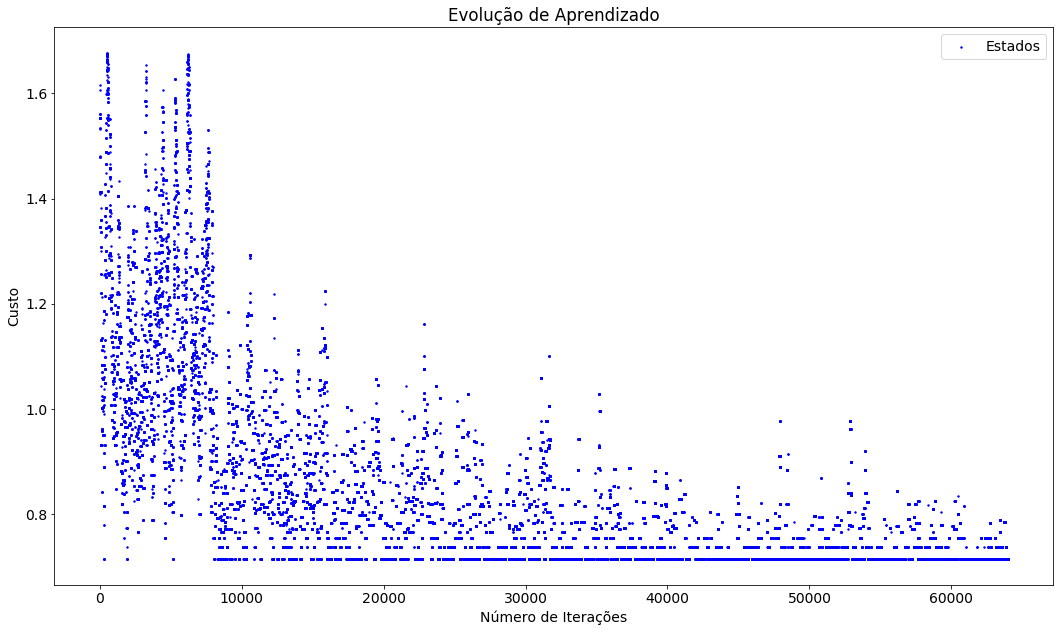

In [22]:
# visualização da evolução da função custo

plt.figure(figsize=(15, 9))

J_hist_mean = J_hist[:-1].reshape((-1,500))[:, 0]
J_hist_std = np.abs(J_hist[:-1].reshape((-1, 500)).std(axis=1))

#plt.axhline(J_min, color='r', label='Solução Ótima')
plt.scatter(range(len(J_hist)), J_hist, s=2, color='b', label='Estados')

plt.legend(loc="upper right")
plt.title("Evolução de Aprendizado")
plt.ylabel("Custo")
plt.xlabel("Número de Iterações")

plt.tight_layout()
plt.show()